<a href="https://colab.research.google.com/github/elifulton/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module1-exploratory-data-analysis/Copy_of_LS_DS_111_Exploratory_Data_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Loading and Exploring Datasets

This assignment is purposely open-ended. You will be asked to load datasets from the [UC-Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Even though you maybe using different datasets than your fellow classmates, try and be supportive and assist each other in the challenges that you are facing. You will only deepend your understanding of these topics as you work to assist one another. Many popular UCI datasets face similar data loading challenges.

Remember that the UCI datasets do not necessarily have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally or using the `!curl` shell command -or in some other way before you try and read it in as a dataframe. This will help you catch what would otherwise be unforseen problems.

Feel free to embellish this notebook with additional markdown cells,code cells, comments, graphs, etc. Whatever you think helps adequately address the questions.

## 1) Load a dataset from UCI (via its URL)

Please navigate to the home page and choose a dataset (other than the Adult dataset) from the "Most Popular" section on the right-hand side of the home page. Load the dataset via its URL and check the following (show your work):

- Are the headers showing up properly?
- Look at the first 5 and the last 5 rows, do they seem to be in order?
- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.
- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
- if `NaN` values or other missing value indicators are not being detected by `df.isnull().sum()` find a way to replace whatever is indicating the missing values with `np.NaN`.
- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

In [63]:
# standard importing of pandas
import pandas as pd

# grabbing URL and assigning dataframe to CSV read of the URL
cars_set = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
df = pd.read_csv(cars_set)

# using df.head() indicates that the headers AREN'T showing up properly (an entry is being mistakenly read as the header)
# also, there are 7 attribute columns, compared to the 6 that the site says there should be (although this is due to the acceptability column containing class values)
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [64]:
# using df.tail() and printing df.shape indicates that the entries appear to be in order and all the 1728 entries are there (except for the one mistaken for the header)
df.tail()

,vhigh,vhigh.1,2,2.1,small,low,unacc
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good
1726,low,low,5more,more,big,high,vgood


In [65]:
print(df.shape)

(1727, 7)


In [66]:
# df.isnull().sum() indicates no null values, which matches what the site says about there being no missing values
df.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [67]:
# after fixing the header, df.describe() shows that the number of unique values per column correspond to what the site says, and also shows the most frequent attributes per column with their frequencies
new_headers = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'acceptability']
df = pd.read_csv(cars_set, names=new_headers)

df.describe()

,buying,maint,doors,persons,lug_boot,safety,acceptability
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,low,low,3,2,big,low,unacc
freq,432,432,432,576,576,576,1210


## 2) Load a dataset from your local machine.
Choose a second dataset from the "Popular Datasets" listing on UCI, but this time download it to your local machine instead of reading it in via the URL. Upload the file to Google Colab using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

- Answer all of the same bullet point questions from part 1 again on this new dataset. 


In [68]:
# after uploading the file (I'm using Firefox, so unfortunately I can't use the import from google.colab) and assigning dataframe to the CSV read of the file, we're good to go

df = pd.read_csv('abalone.data')

# df.head() shows that once again, an entry is being used as the header (:P) and that there are 9 attribute columns compared to the 8 the site says there should be (again, because of one column containing class values)
df.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [69]:
# and again, using df.tail() and printing df.shape() shows that the entries are in order and the 4177 entries are all there, except for the one used as the header

df.tail()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4175,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [70]:
print(df.shape)

(4176, 9)


In [71]:
# df.isnull().sum() shows there are no missing values, which again checks out with the site saying there are no missing values
df.isnull().sum()

M         0
0.455     0
0.365     0
0.095     0
0.514     0
0.2245    0
0.101     0
0.15      0
15        0
dtype: int64

In [72]:
# after fixing the header, df.describe() shows the mean, standard deviation, min values, 25th percentile numbers, 50th percentile numbers, 75th percentile numbers, and max values for each number value column
new_headers = ['sex', 'length', 'diameter', 'height', 'whole weight', 'shucked weight', 'viscera weight', 'shell weight', 'rings']
df = pd.read_csv('abalone.data', names=new_headers)

df.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [73]:
# using df.describe for the sex column (the one with class values) we see three unique values (expected) and that the most frequent sex is male, with 1528 male abalones
df.describe(exclude='number')

,sex
count,4177
unique,3
top,M
freq,1528


## 3) Make Crosstabs of the Categorical Variables

Take whichever of the above datasets has more categorical variables and use crosstabs to tabulate the different instances of the categorical variables.


In [77]:
# resetting df to (fixed) cars data set

cars_set = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
new_headers = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'acceptability']
df = pd.read_csv(cars_set, names=new_headers)

# safety and acceptability table

pd.crosstab(df['safety'], df['acceptability'], margins=True)

acceptability,acc,good,unacc,vgood,All
safety,,,,,
high,204,30,277,65,576
low,0,0,576,0,576
med,180,39,357,0,576
All,384,69,1210,65,1728


In [78]:
# buying price and maintenance price table

pd.crosstab(df['buying'], df['maint'], margins=True)

maint,high,low,med,vhigh,All
buying,,,,,
high,108,108,108,108,432
low,108,108,108,108,432
med,108,108,108,108,432
vhigh,108,108,108,108,432
All,432,432,432,432,1728


In [79]:
# number of doors and number of people table

pd.crosstab(df['doors'], df['persons'], margins=True)

persons,2,4,more,All
doors,,,,
2,144,144,144,432
3,144,144,144,432
4,144,144,144,432
5more,144,144,144,432
All,576,576,576,1728


In [80]:
# number of doors and size of luggage boot table

pd.crosstab(df['doors'], df['lug_boot'], margins=True)

lug_boot,big,med,small,All
doors,,,,
2,144,144,144,432
3,144,144,144,432
4,144,144,144,432
5more,144,144,144,432
All,576,576,576,1728


## 4) Explore the distributions of the variables of the dataset using:
- Histograms
- Scatterplots
- Density Plots

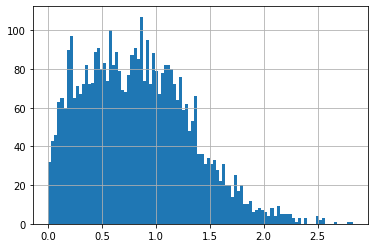

In [91]:
# resetting df to be (fixed) abalone data set

new_headers = ['sex', 'length', 'diameter', 'height', 'whole weight', 'shucked weight', 'viscera weight', 'shell weight', 'rings']
df = pd.read_csv('abalone.data', names=new_headers)

# histogram of whole weights

df['whole weight'].hist(bins=100);

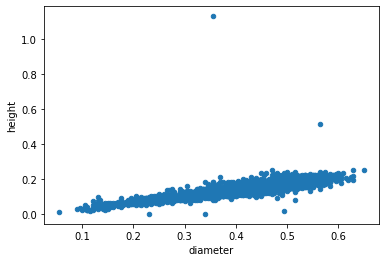

In [92]:
# scatter plot of diameter vs height

df.plot.scatter('diameter', 'height');

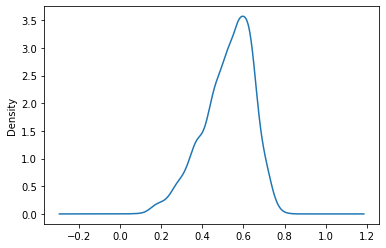

In [93]:
# density plot of length of shell

df['length'].plot.density();

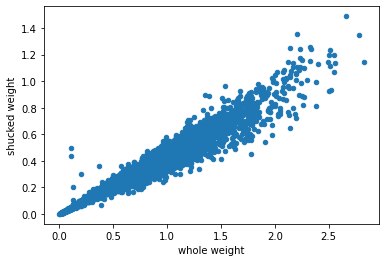

In [94]:
# scatter plot of whole weight vs shucked weight

df.plot.scatter('whole weight', 'shucked weight');

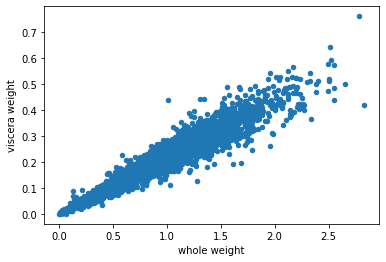

In [95]:
# scatter plot of whole weight vs viscera weight

df.plot.scatter('whole weight', 'viscera weight');

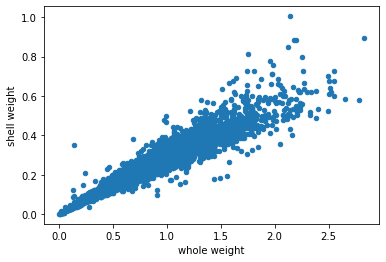

In [96]:
# scatter plot of whole weight vs shell weight

df.plot.scatter('whole weight', 'shell weight');

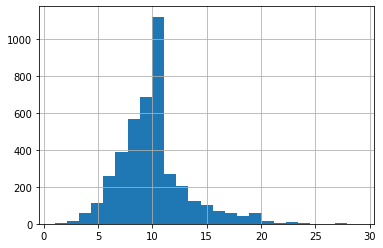

In [104]:
# histogram of number of rings (or age in years)

df['rings'].hist(bins=25);

## 5) Create at least one visualization from a crosstab:

Remember that a crosstab is just a dataframe and can be manipulated in the same way by row index, column, index, or column/row/cell position.


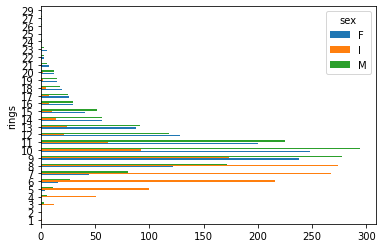

In [105]:
# crosstab bar graph of rings vs sex of abalone

pd.crosstab(df['rings'], df['sex']).plot(kind='barh');

## Stretch Goals 

The following additional study tasks are optional, they are intended to give you an opportunity to stretch yourself beyond the main requirements of the assignment. You can pick and choose from the below, you do not need to complete them in any particular order.

### - Practice Exploring other Datasets



### -  Try using the Seaborn plotting library's "Pairplot" functionality in order to explore all of the possible histograms and scatterplots of your dataset all at once:

[Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

### - Turn some of the continuous variables into categorical variables by binning the values using:
- [pd.cut()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)
- [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)
- <https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut>

And then use crosstabs to compare/visualize these binned variables against the other variables.


### - Other types and sources of data
Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.

In [106]:
# STRETCH - Exploring Iris database

# grabbing URL and assigning dataframe to CSV read of the URL
iris_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(iris_data)

# using df.head() indicates that the headers AREN'T showing up properly (an entry is being mistakenly read as the header)
# also, there are 5 attribute columns, compared to the 4 that the site says there should be (again due to a column containing class values)
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [109]:
# calling df.tail() and printing df.shape shows that the entries are in order and all 150 entries are there (except for the one mistaken for the header)

df.tail()

,5.1,3.5,1.4,0.2,Iris-setosa
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [108]:
print(df.shape)

(149, 5)


In [110]:
# df.isnull().sum() shows there are no missing values, which checks out with the site saying there are no missing values
df.isnull().sum()

5.1            0
3.5            0
1.4            0
0.2            0
Iris-setosa    0
dtype: int64

In [111]:
# fixing the header and using df.describe() on both the numerical and non-numerical columns shows these tables

new_headers = ['s-length', 's-width', 'p-length', 'p-width', 'species']
df = pd.read_csv(iris_data, names=new_headers)

df.describe()

,s-length,s-width,p-length,p-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [112]:
df.describe(exclude='number')

,species
count,150
unique,3
top,Iris-setosa
freq,50


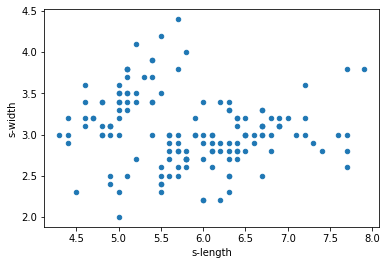

In [115]:
# now to examine for trends by using scatter plots and crosstabs

# sepal length vs sepal width
df.plot.scatter('s-length', 's-width');

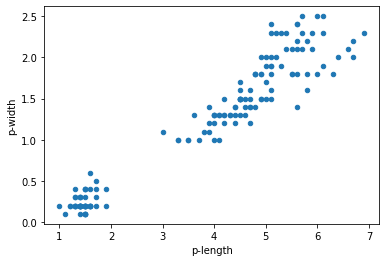

In [116]:
# petal length vs petal width
df.plot.scatter('p-length', 'p-width');

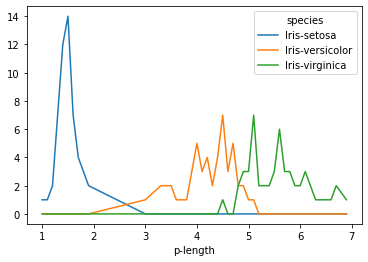

In [121]:
# petal length as it relates to species
pd.crosstab(df['p-length'], df['species']).plot();